# Code to detect edges in an image
### Splits image into pieces
#### Feb 28, 2019

In [1]:
# Import modules

import sys
import datetime
import subprocess as sp
import argparse
import pandas as pd
import numpy as np
import time
from IPython.display import display

import matplotlib.pyplot as plt

from scipy import ndimage as ndi
from skimage import feature



In [2]:
# mpi part of the code
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()


## Modules

In [3]:
   
# Generate noisy image of a square
def f_create_image(size):
    '''
    Create image
    Steps: make blank image, add brightness in a square and rotate it.
    '''
    
    im = np.zeros((size, size))
    factor=int(size/4)
#     print(factor)

    im[factor:-factor, factor:-factor] = 1
    im = ndi.rotate(im, 45, mode='constant',reshape=False)
    im = ndi.gaussian_filter(im, 4)
    im += 0.2 * np.random.random(im.shape)
#     print(im.shape)

    return im

# Detect edges
def f_detect_edge(im,sigma=3):
    # Compute the Canny filter for two values of sigma
    edges1 = feature.canny(im)
    edges2 = feature.canny(im, sigma=sigma)
    
    return edges1,edges2


# Plot functions
def f_plot_single_image(im):
    
    plt.figure()
    plt.imshow(im, cmap=plt.cm.gray)
    plt.axis('off')


def f_plot_all(im,edges1,edges2):
    '''
    Function to plot the 3 images: original, simple detection, best detection.
    Reads in 3 arrays
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                        sharex=True, sharey=True)

    ax1.imshow(im, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('noisy image', fontsize=20)
    
    ax2.imshow(edges1, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

    ax3.imshow(edges2, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title('Canny filter, $\sigma=2$', fontsize=20)

    fig.tight_layout()

#     plt.show()

## Edge detection using image split

Time for one loop 2.023717164993286
Time for one loop 2.0229954719543457
Time for one loop 2.0131919384002686
Time for one loop 2.0134706497192383
Total time: 8.667685270309448


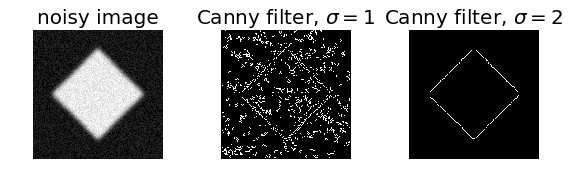

In [4]:
t0=time.time()

im=f_create_image(256)
length=im.shape[0]
# print("Image size",length)
num_pieces=4
split_lst=np.split(im,num_pieces)
im_combined_lst_1=[[] for i in range(num_pieces)]
im_combined_lst_2=[[] for i in range(num_pieces)]


for count,arr in enumerate(split_lst):
    t1=time.time()
#     print(arr.shape)
    edges1,edges2=f_detect_edge(arr,sigma=2)
    t2=time.time()
#     f_plot_all(arr,edges1,edges2)
    im_combined_lst_1[count]=edges1
    im_combined_lst_2[count]=edges2
    time.sleep(2)
    t3=time.time()
    print("Time for one loop",t3-t1)
    
im_combined1=np.vstack(im_combined_lst_1)
im_combined2=np.vstack(im_combined_lst_2)
# f_plot_single_image(im_combined2)

f_plot_all(im,im_combined1,im_combined2)
plt.savefig('edge_detection_split.pdf')

t_end=time.time()

print("Total time:",t_end-t0)

In [5]:
# # automatic MPI datatype discovery
# if rank == 0:
#     data = np.arange(100, dtype=np.float64)
#     comm.Send(data, dest=1, tag=13)
# elif rank == 1:
#     data = np.empty(100, dtype=np.float64)
#     comm.Recv(data, source=0, tag=13)

In [6]:
# ! jupyter nbconvert --to script 2_mpi_Edge_detection.ipynb



[NbConvertApp] Converting notebook 2_mpi_Edge_detection.ipynb to script
[NbConvertApp] Writing 3143 bytes to 2_mpi_Edge_detection.py
